## Exercise 3
In the videos you looked at how you would improve Fashion MNIST using Convolutions. For your exercise see if you can improve MNIST to 99.8% accuracy or more using only a single convolutional layer and a single MaxPooling 2D. You should stop training once the accuracy goes above this amount. It should happen in less than 20 epochs, so it's ok to hard code the number of epochs for training, but your training must end once it hits the above metric. If it doesn't, then you'll need to redesign your layers.

I've started the code for you -- you need to finish it!

When 99.8% accuracy has been hit, you should print out the string "Reached 99.8% accuracy so cancelling training!"

In [4]:
import tensorflow as tf

In [31]:
# GRADED FUNCTION: train_mnist_conv
def train_mnist_conv(epoch):
    # Please write your code only where you are indicated.
    # please do not remove model fitting inline comments.

    # YOUR CODE STARTS HERE
    class stopAt95(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs['val_accuracy'] >= 0.95:
                self.model.stop_training = True
                print(f"Reach target at epoch: {epoch}")

    # YOUR CODE ENDS HERE

    mnist = tf.keras.datasets.mnist
    (training_images, training_labels), (test_images, test_labels) = mnist.load_data()
    # YOUR CODE STARTS HERE
    x_train = training_images.reshape(-1,28,28,1) /255.
    x_test = test_images.reshape(-1,28,28,1) /255.
    # YOUR CODE ENDS HERE

    model = tf.keras.models.Sequential([
            # YOUR CODE STARTS HERE
            tf.keras.layers.Conv2D(3,3),
            tf.keras.layers.Conv2D(3,3),
            tf.keras.layers.MaxPool2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(10, activation='softmax'),
            # YOUR CODE ENDS HERE
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # model fitting
    history = model.fit(
        # YOUR CODE STARTS HERE
        x_train, training_labels,
        validation_data=(x_test, test_labels),
        callbacks=[stopAt95()],
        epochs=epoch,

        # YOUR CODE ENDS HERE
    )
    # model fitting
    return model, history

In [32]:
epochs = 10
model, history = train_mnist_conv(epochs)
history = history.history

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3776 - accuracy: 0.8881 - val_loss: 0.2360 - val_accuracy: 0.9322


-------- train history --------
last_train_loss:  0.16601061820983887


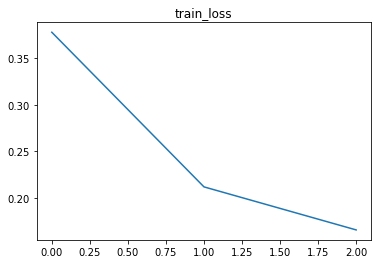

In [44]:
import matplotlib.pyplot as plt
print('\n-------- train history --------')
print('last_train_loss: ', history['loss'][-1])
plt.plot(history['loss'])
plt.title('train_loss')
plt.show()

last_train_accuracy:  0.9513166546821594


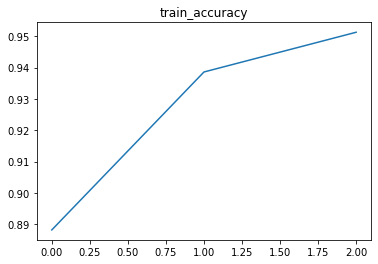

In [46]:
print('last_train_accuracy: ', history['accuracy'][-1])
plt.plot(history['accuracy'])
plt.title('train_accuracy')
plt.show()


-------- validation history --------
last_val_loss:  0.1511869877576828


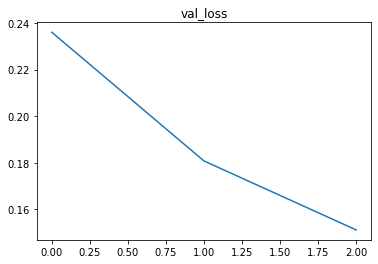

In [47]:
print('\n-------- validation history --------')
print('last_val_loss: ', history['val_loss'][-1])
plt.plot(history['val_loss'])
plt.title('val_loss')
plt.show()

In [ ]:
print('last_val_accuracy: ', history.val_accuracy[-1])
plt.plot(history.val_accuracy)
plt.title('val_accuracy')
plt.show()

In [51]:
mnist = tf.keras.datasets.mnist
_ , (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(-1,28,28,1) /255.
eval = model.evaluate(x_test, y_test)
print('loss     : ',eval[0])
print('accuracy : ',eval[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.1512 - accuracy: 0.9563

In [53]:
tf.keras.backend.set_floatx('float64')
num = 20
print('Check: pred  = ',tf.argmax(model(x_test[num:num+1]),axis=1).numpy()[0])
print('Check: y     = ',y_test[num])

Check: pred  =  9
Check: y     =  9
